# 2. Explore a netCDF dataset

### Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [2]:
# Load modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Show plots in the notebook
%matplotlib inline

In [3]:
# Open a netCDF4 file and see it
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

In [28]:
# Plate Carree projection
proj=ccrs.PlateCarree()

In [29]:
#Read variables
time=ds['time'][:]
lat=ds['lat'][:]
lon=ds['lon'][:]
lw1=ds['toa_lw_all_mon'][:,:,:]

No handles with labels found to put in legend.


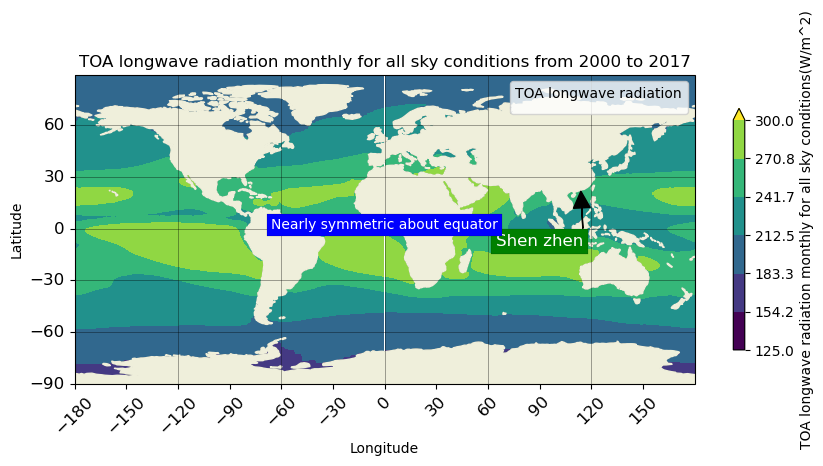

In [52]:
#Calculate the mean of longwave radiation
lw1_mean=np.mean(lw1,axis=0)

# Create and define the size of a figure object 
plt.figure(figsize=(10,8), dpi=100) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

lw1_mean.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), vmin=125, vmax=300,cbar_kwargs={'shrink': 0.4,'label':"TOA longwave radiation monthly for all sky conditions(W/m^2)"})

# legend
plt.legend(title='TOA longwave radiation',loc='best')   

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.LAND, zorder=1)

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', alpha=0.5)

# annotate
plt.annotate('Shen zhen', xy=(114,22), xytext=(90, -10),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')

# text
plt.text(0,0,"Nearly symmetric about equator", transform=plt.gca().transData, horizontalalignment='center', color='white',
         bbox=dict(boxstyle='square', fc='blue', linewidth=0.1))

#The title
plt.title("TOA longwave radiation monthly for all sky conditions from 2000 to 2017")

# x label and y label
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust xy axis ticks
plt.xticks(ticks=np.arange(-180,180,30), fontsize=12, rotation=45, ha='center', va='top')
plt.yticks(ticks=np.arange(-90,90,30), fontsize=12, rotation=0, ha='right', va='center')

plt.show()

### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [7]:
# Open a netCDF4 file and see it
dss = xr.open_dataset("temp_ITPCAS-CMFD_V0106_B-01_01dy_010deg_201601-201612.nc", engine="netcdf4")
dss

<xarray.Dataset>
Dimensions:  (lat: 400, lon: 700, time: 366)
Coordinates:
  * lat      (lat) float32 15.05 15.15 15.25 15.35 ... 54.65 54.75 54.85 54.95
  * lon      (lon) float32 70.05 70.15 70.25 70.35 ... 139.6 139.8 139.9 140.0
  * time     (time) datetime64[ns] 2016-01-01T10:30:00 ... 2016-12-31T10:30:00
Data variables:
    temp     (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Created at 2017-04-16 03:43:48 UTC by the ITPCAS Data Fusio...
    source:       ITPCAS Data Fusion System (Version: 01.02.0240)
    institution:  Institute of Tibetan Plateau Research, Chinese Academy of S...
    title:        Daily mean near surface air temperature from the ITPCAS Chi...
    description:  Data from ITPCAS China Meteorological Forcing Dataset (Vers...
    references:   He, J., and K. Yang, 2011: China Meteorological Forcing Dat...
    frequency:    day

In [8]:
#Read variables
time=dss['time'][:]
lat=dss['lat'][:]
lon=dss['lon'][:]
temp=dss['temp'][:,:,:]

No handles with labels found to put in legend.


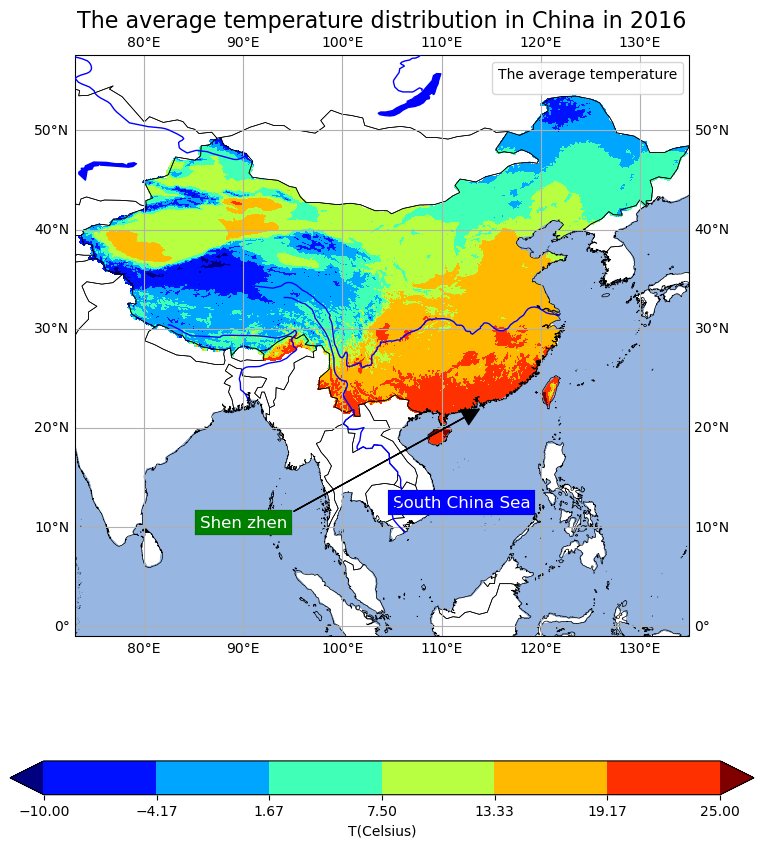

In [89]:
#Calculate the mean of SST
temp_mean=np.mean(temp,axis=0)-273.15

# Create and define the size of a figure object 
plt.figure(figsize=(12,11), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 108.0, 34.0 # Xi An
proj1 = ccrs.PlateCarree()

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj1)
temp_mean.plot.contourf(ax=ax, cmap='jet',transform=ccrs.PlateCarree(), vmin=-10, vmax=25,cbar_kwargs={'orientation': 'horizontal'
,'shrink': 0.8,'label':'T(Celsius)'})

# Set a region and plot
extent = [central_lon-35, central_lon+27, central_lat-35, central_lat+20]
ax.set_extent(extent)


# Add features to axes using cartopy.feature (cfeature)
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, zorder=1)

# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
ax.gridlines(draw_labels=True)
plt.tick_params(labelsize=30)

# legend
plt.legend(title='The average temperature',loc='best')   

# annotate
plt.annotate('Shen zhen', xy=(114,22), xytext=(90, 10),
             bbox=dict(boxstyle='square', fc='green', linewidth=0.1),
             arrowprops=dict(facecolor='black', shrink=0.01, width=0.1), 
             fontsize=12, color='white', horizontalalignment='center')
# text
plt.text(112,12,"South China Sea", transform=plt.gca().transData, horizontalalignment='center', color='white',
        bbox=dict(boxstyle='square', fc='blue', linewidth=0.1),fontsize=12)

#The title
plt.title("The average temperature distribution in China in 2016",fontsize=16)

plt.show()